# Machine Learning Project Template
* This notebook provides a structured template for building an end-to-end machine learning project.
* Re-use this notebook througout your learning and in capstone project

## <b> <font color=green> STEP (1) Problem Definition, Scoping & Framing </font> </b>

### 1.1) Load Libraries
Import all necessary libraries for the project.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer

### 1.2) Load The Dataset
Load the dataset and display the first few rows.

In [3]:
df_movie = pd.read_csv("rotten_tomatoes_movies.csv", on_bad_lines='skip', engine='python')
df_movie.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


## <b> <font color=green> STEP (2) Data Exploration & Understanding </font> </b>

### 2.1) Descriptive Statistics
Generate summary statistics for the dataset.

In [4]:
df_movie.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,930.000000,938.000000,938.000000,934.000000,9.340000e+02,939.000000,939.000000,939.000000
mean,104.972043,66.195096,33.642857,63.622056,7.852088e+04,8.076677,21.914803,11.744409
std,20.663048,27.693036,37.509179,19.609302,1.099172e+06,10.665813,25.177942,21.161393
min,8.000000,0.000000,5.000000,11.000000,6.000000e+00,0.000000,0.000000,0.000000
25%,92.250000,45.000000,12.000000,49.000000,2.014250e+03,1.000000,6.000000,2.000000
50%,101.500000,73.000000,21.000000,67.000000,6.979500e+03,4.000000,13.000000,5.000000
75%,114.000000,90.000000,40.000000,80.000000,2.579275e+04,10.000000,28.500000,10.000000
max,243.000000,100.000000,278.000000,100.000000,3.340399e+07,58.000000,207.000000,151.000000


### 2.2) Data Visualizations
Visualize the data to identify patterns and relationships.

content Rating Category:['PG' 'R' 'NR' 'G' 'PG-13' 'NC17']


[Text(0, 0, '315'),
 Text(0, 0, '237'),
 Text(0, 0, '188'),
 Text(0, 0, '116'),
 Text(0, 0, '82'),
 Text(0, 0, '1')]

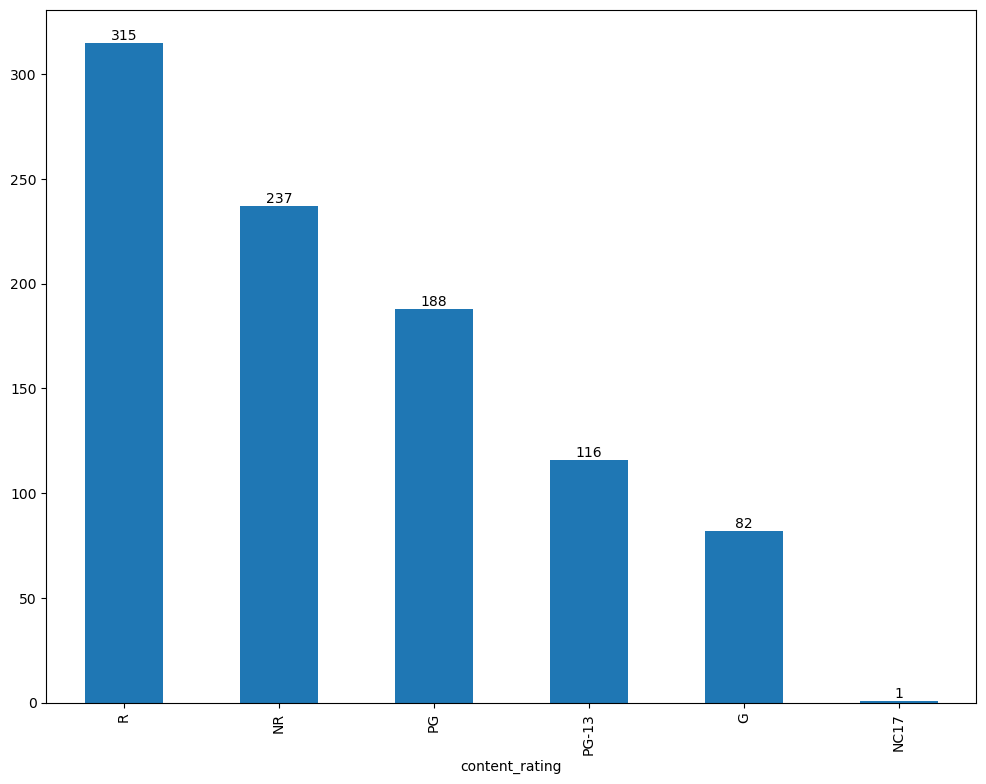

In [5]:
#Visualize Content Rating Catogery
print(f'content Rating Category:{df_movie.content_rating.unique()}')
ax=df_movie.content_rating.value_counts().plot(kind='bar',figsize=(12,9))
ax.bar_label(ax.containers[0])

Audience status Category:['Spilled' 'Upright' nan]


[Text(0, 0, '577'), Text(0, 0, '357')]

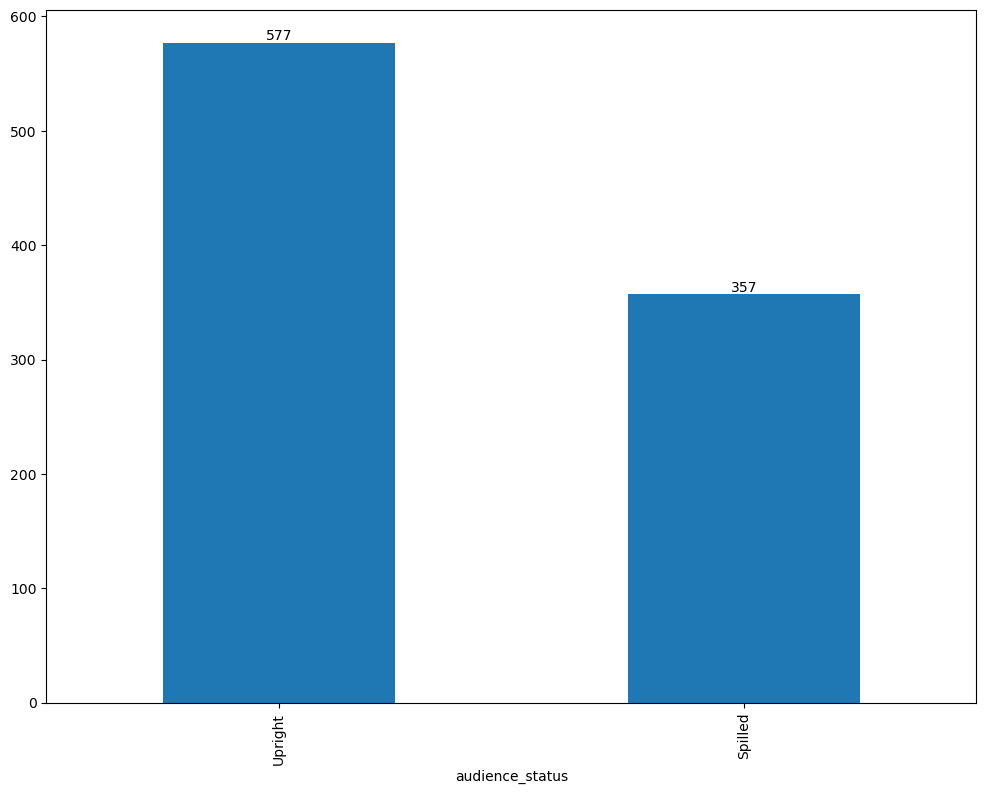

In [6]:
#Visualize Audience status
print(f'Audience status Category:{df_movie.audience_status.unique()}')
ax=df_movie.audience_status.value_counts().plot(kind='bar',figsize=(12,9))
ax.bar_label(ax.containers[0])

## <b> <font color=green> STEP (3) Data Preparation & Feature Engineering </font> </b>

### 3.1) Data Cleaning
Handle missing values and outliers.

### 3.1) Feature Selection
Select the most relevant features for the model.

### 3.2) Data Transforms
Apply transformations to prepare the data for modeling.

## <b> <font color=green> STEP (4)  ML Model Selection & Evaluation </font> </b>

### 4.1) Split-out Validation Dataset
Split the dataset into training and validation sets.

### 4.2) Test Options and Evaluation Metric
Define the evaluation metric for the model.

### 4.3) Spot Check Algorithms
Test multiple algorithms to identify the best-performing one.

## <b> <font color=green> STEP (4)  Performance Tuning & Optimization </font> </b>

### 4.1) Algorithm Tuning
Optimize hyperparameters for better performance.

### 4.2) Ensembles
Combine multiple models to improve accuracy.

## <b> <font color=green> STEP (6) Results Interpretation & Deployment </font> </b>

### 6.1) Predictions on Validation Dataset
Make predictions using the validation dataset.

### 6.2) Create Standalone Model on Entire Training Dataset
Train the final model on the entire dataset.

### 6.3) Save Model for Later Use
Save the trained model to a file.